#**Packages Required**

In [ ]:
pip install ydata-profiling --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 746.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=28a01473b1284e22eec403eb92f62d7b6cafab56e6fa8a504958ba1ece40fee6
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

#**EDA**

In [ ]:
maintenance=pd.read_csv('/content/predictive_maintenance.csv')
maintenance.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
maintenance.drop('UDI',axis=1,inplace=True)
maintenance.drop('Product ID',axis=1,inplace=True)
maintenance.drop('Failure Type',axis=1,inplace=True)

In [ ]:
maintenance.shape

(10000, 7)

In [ ]:
maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [ ]:
maintenance.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.033900  
std        9.968934        63.654147      0.180981  
min        3.800000         0.000000      0.000000  
25%       33.200000        53.000000      0.000000  
50%       40.100000       108.000000      0.000000  
75%       46.800000       162.000000      0.000000  
max       76.600000       253.000000      1.000000

In [ ]:
maintenance.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

In [ ]:
maintenance.duplicated().sum()

np.int64(0)

In [ ]:
profile = ProfileReport(maintenance, title="Predictive Maintenance Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 21.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

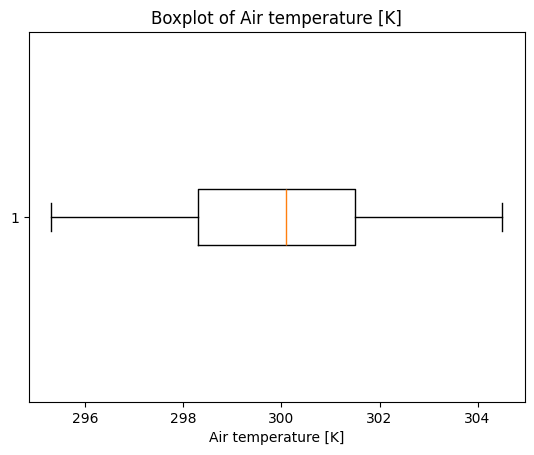

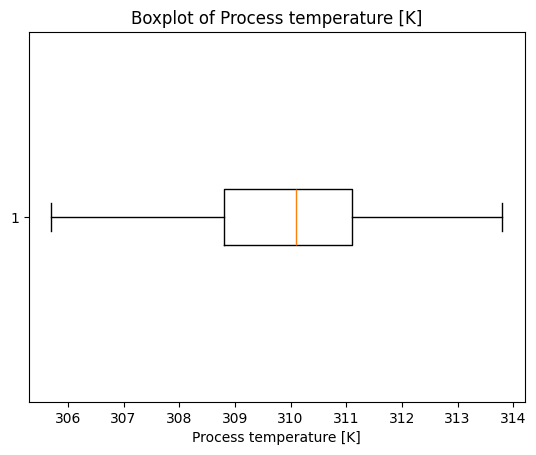

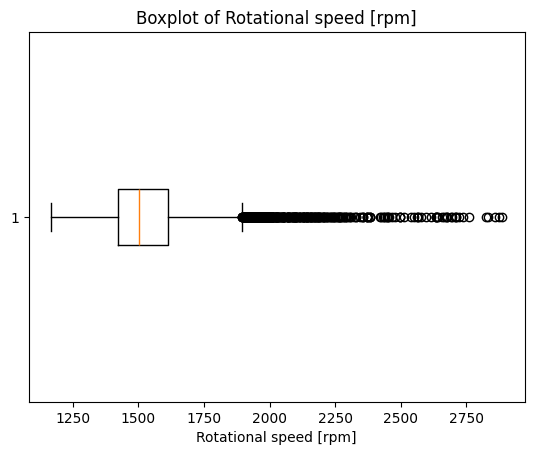

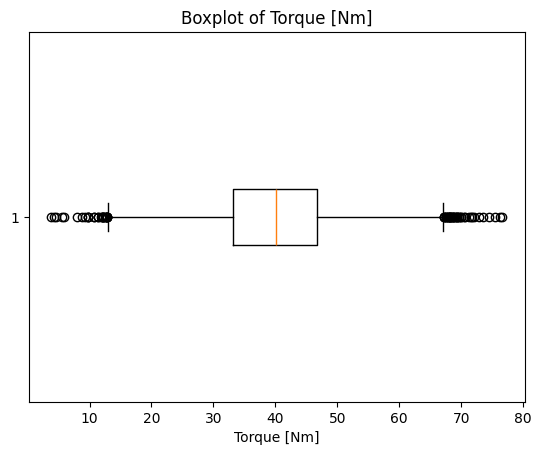

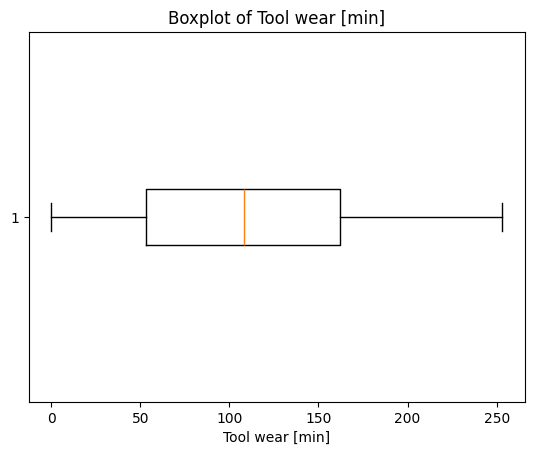

In [ ]:
numeric_cols = ['Air temperature [K]'	,'Process temperature [K]'	,'Rotational speed [rpm]'	,'Torque [Nm]'	,'Tool wear [min]']
for col in numeric_cols:
    plt.figure()
    plt.boxplot(maintenance[col].dropna(), vert=False) #horizontal
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


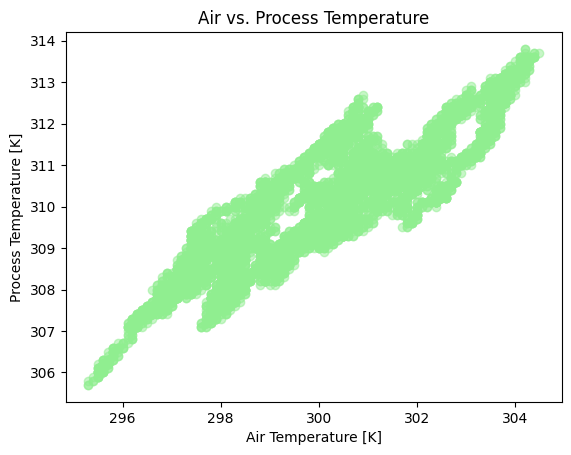

In [ ]:
plt.figure()
plt.scatter(maintenance['Air temperature [K]'],maintenance['Process temperature [K]'],color='lightgreen', alpha=0.5)

plt.title('Air vs. Process Temperature')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Process Temperature [K]')
plt.show()

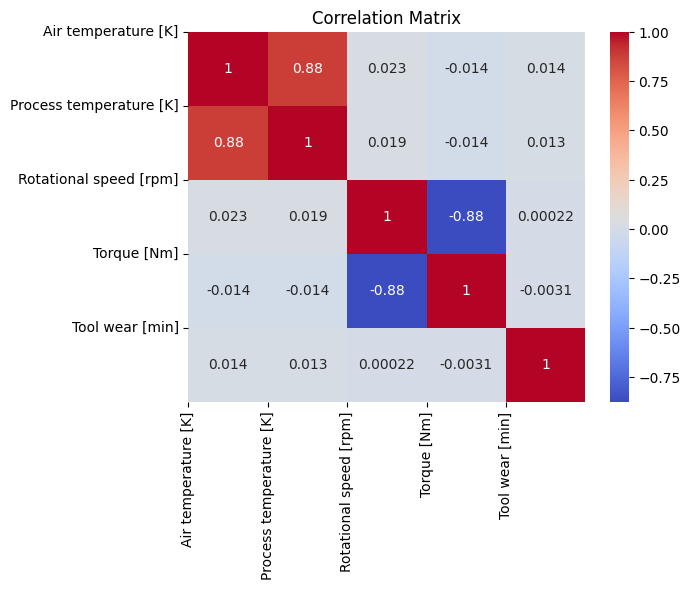

In [ ]:
corr = maintenance[numeric_cols].corr()   #return : dataframe
plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix')
plt.show()

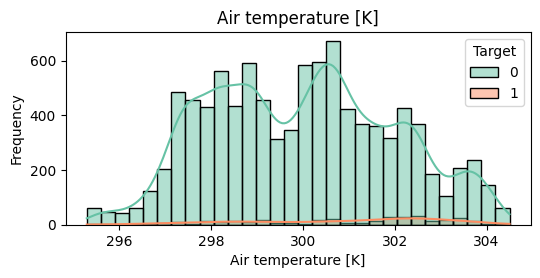

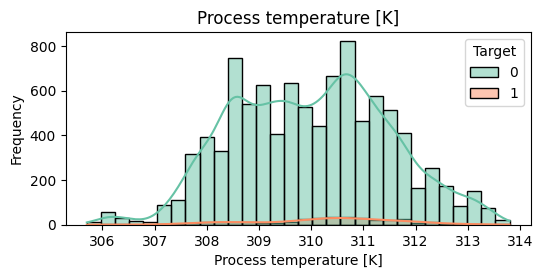

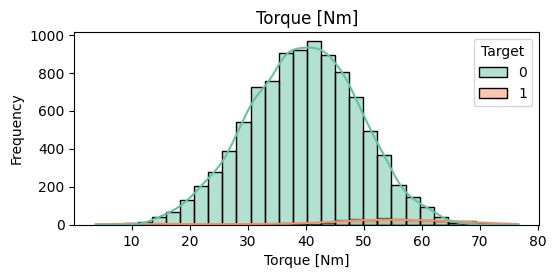

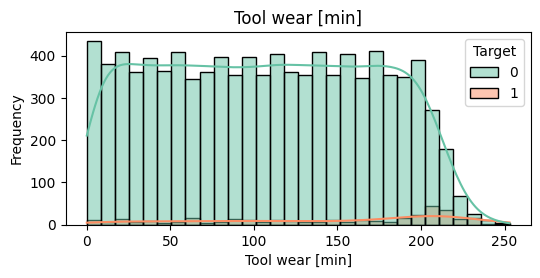

In [ ]:
numeric_cols = ['Air temperature [K]'	,'Process temperature [K]','Torque [Nm]'	,'Tool wear [min]']

for col in numeric_cols:
    plt.figure(figsize=(6, 2.5))
    sns.histplot(data= maintenance, x= col, kde= True, bins= 30, hue= 'Target', palette= 'Set2')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    plt.show()

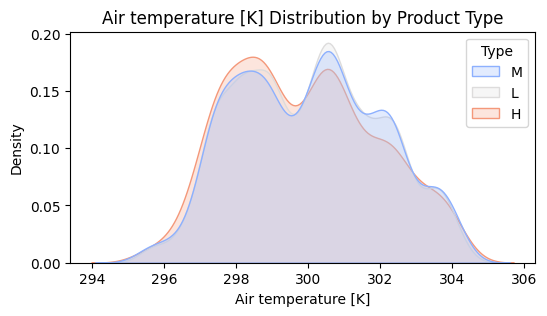

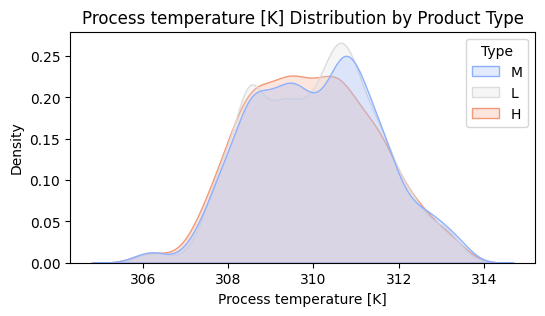

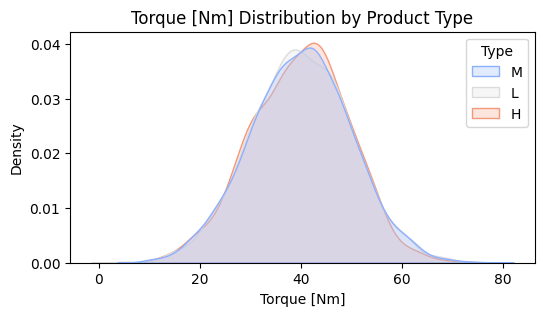

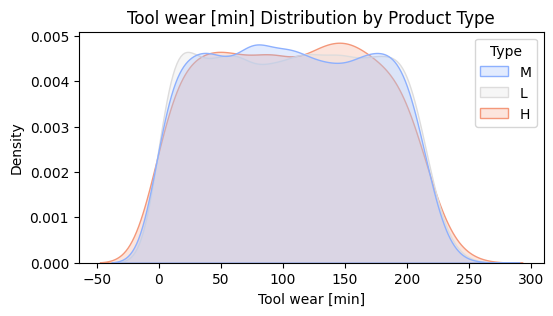

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data=maintenance, x=col, hue='Type', fill=True, common_norm=False,palette='coolwarm') #common_norm = False >> (normalize each class in 'Type' separately)
    plt.xlabel(col)
    plt.title(f'{col} Distribution by Product Type')
    plt.show()

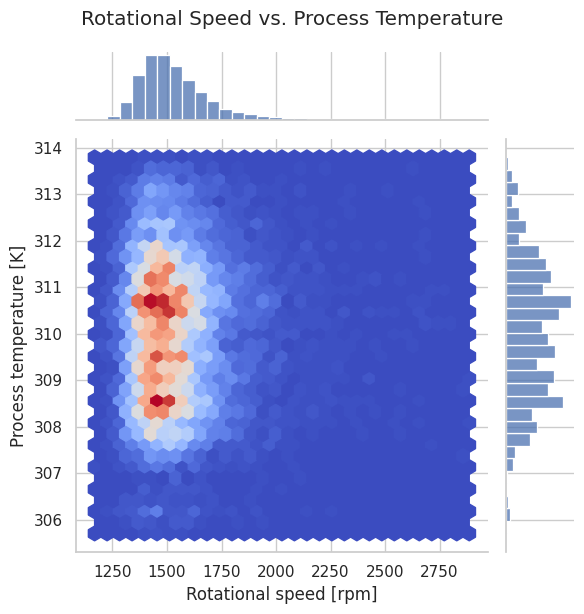

In [ ]:
sns.set(style="whitegrid")
plot = sns.jointplot(
    data=maintenance,
    x='Rotational speed [rpm]',
    y='Process temperature [K]',
    kind='hex',
    gridsize=30,
    cmap='coolwarm',
    marginal_kws=dict(bins=30, fill=True)
)

plot.fig.suptitle('Rotational Speed vs. Process Temperature', y=1.02)
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.95)  # Adjust title position

plt.show()

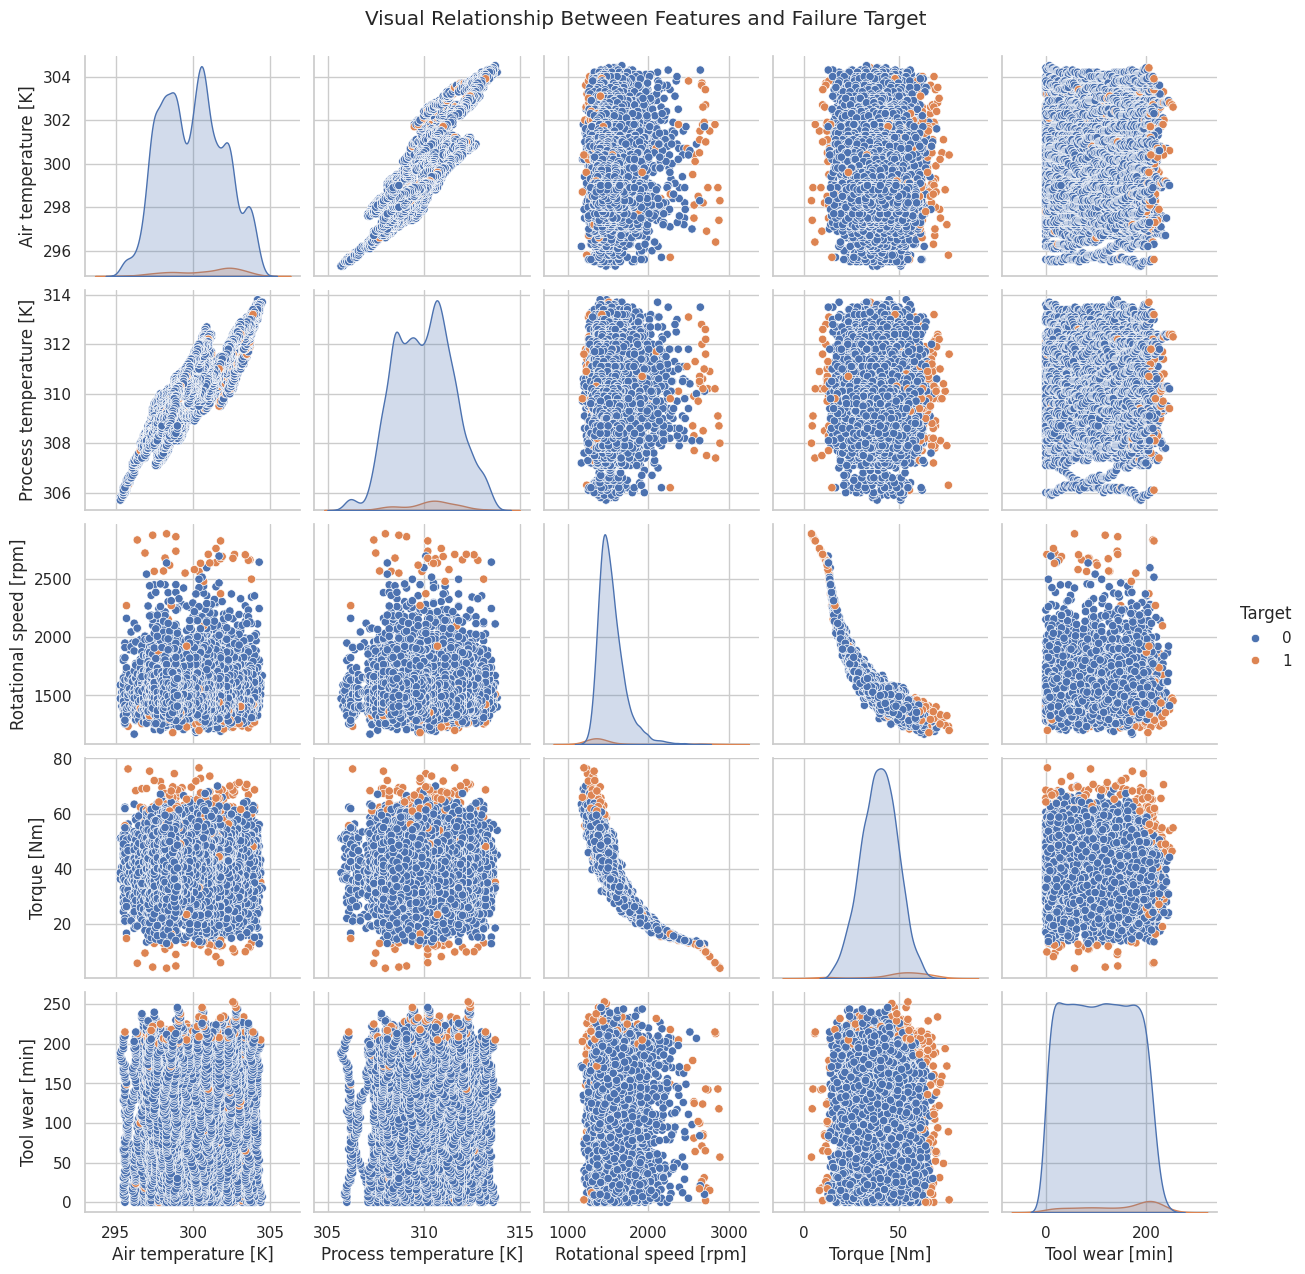

In [ ]:
sns.pairplot(maintenance, hue="Target", vars=[   #each combination of vars
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
])
plt.suptitle("Visual Relationship Between Features and Failure Target", y=1.02)
plt.show()

# SMOTE Sampling & Train Test Split

In [ ]:
df=maintenance.copy()
df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1551         42.8                0       0  
1                       1408         46.3                3       0  
2                       1498         49.4                5       0  
3                       1433         39.5                7       0  
4                       1408         40.0                9       0  
...                      ...          ...              ...     ...  
9995                    1604         29.5               14       0  
9996                    1632         31.8               17       0  
9997                    1645         33.4               22       0  
9998                    1408         48.5               25       0  
9999                    1500         40.2               30       0  

[10000 rows x 7 columns]

In [ ]:
#Encoding categorical variable 'Type'
encoder = OneHotEncoder(sparse_output=False, drop='first')
type_encoded = encoder.fit_transform(df[['Type']])
type_encoded_df = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(['Type']))
df = df.drop('Type', axis=1)
df = pd.concat([df, type_encoded_df], axis=1)
df

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  Target  Type_L  Type_M  
0            42.8                0       0     0.0     1.0  
1            46.3                3       0     1.0     0.0  
2            49.4                5       0     1.0     0.0  
3            39.5                7       0     1.0     0.0  
4            40.0                9       0     1.0     0.0  
...           ...              ...     ...     ...     ...  
9995         29.5               14       0     0.0     1.0  
9996         31.8               17       0     0.0     0.0  
9997         33.4               22       0     0.0     1.0  
9998         48.5               25       0     0.0     0.0  
9999         40.2               30       0     0.0     1.0  

[10000 rows x 8 columns]

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#  Separating features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Train-test split (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Apply SMOTE "Synthetic Minority Over-sampling Technique" to training set only

smote = SMOTE(random_state=42)

#Adds synthetic samples to minority class (1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ✅ Now X_train_resampled and y_train_resampled are balanced
# Keep X_test, y_test untouched for proper evaluation

## Check Counts after synthetic over-sampling

In [ ]:
print("Shape of X_train before SMOTE (original training data):")
print(X_train.shape)

# Show the class distribution after applying SMOTE
print("\nClass distribution in y_train_resampled after SMOTE (balanced)")
print(y_train_resampled.value_counts())

Shape of X_train before SMOTE (original training data):
(8000, 7)

Class distribution in y_train_resampled after SMOTE (balanced)
Target
0    7729
1    7729
Name: count, dtype: int64


In [ ]:
X_train = X_train_resampled
y_train = y_train_resampled
X_train.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                302.0                    310.9                    1456   
1                297.0                    308.3                    1399   
2                301.0                    311.6                    1357   
3                298.9                    309.8                    1411   
4                297.1                    308.5                    1733   

   Torque [Nm]  Tool wear [min]  Type_L  Type_M  
0         47.2               54     0.0     1.0  
1         46.4              132     0.0     1.0  
2         45.6              137     0.0     1.0  
3         56.3               84     1.0     0.0  
4         28.7               50     1.0     0.0

## Scaling

In [ ]:
#  Scaling numerical features
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

<Axes: >

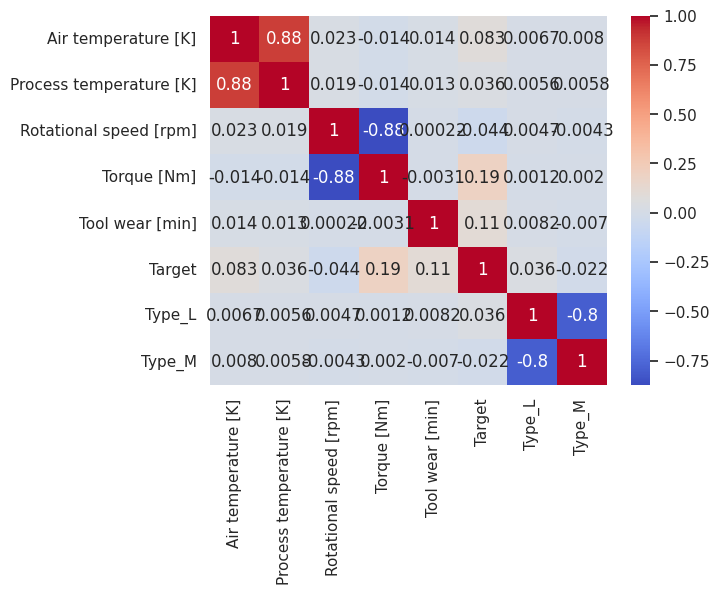

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

#**Models Training and Evaluation**

# 1)**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

model_lr = LogisticRegression(random_state=42)
print("\nLogistic Regression")

# Cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score_lr = cv_scores_lr.mean()

# Train and test
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print results
print(f"Cross-Validation Accuracy: {mean_cv_score_lr:.4f}")
print(f"Test Accuracy: {test_accuracy_lr:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression
Cross-Validation Accuracy: 0.8276
Test Accuracy: 0.8300
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1932
           1       0.14      0.81      0.24        68

    accuracy                           0.83      2000
   macro avg       0.57      0.82      0.57      2000
weighted avg       0.96      0.83      0.88      2000



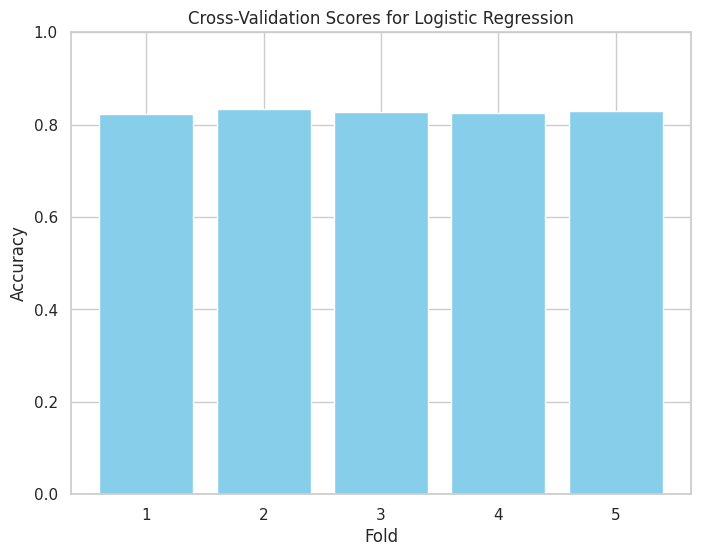

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores_lr, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Logistic Regression')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

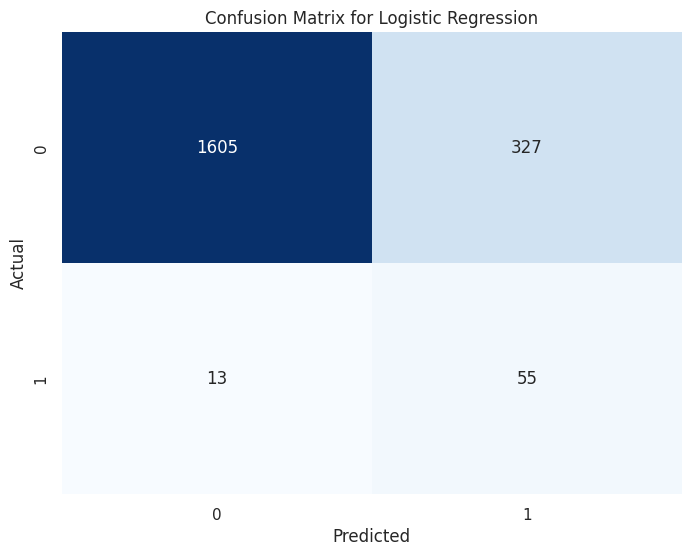

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_lr)

#create a heatmap

plt.figure(figsize=(8,6))
sns.heatmap(cm ,annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()



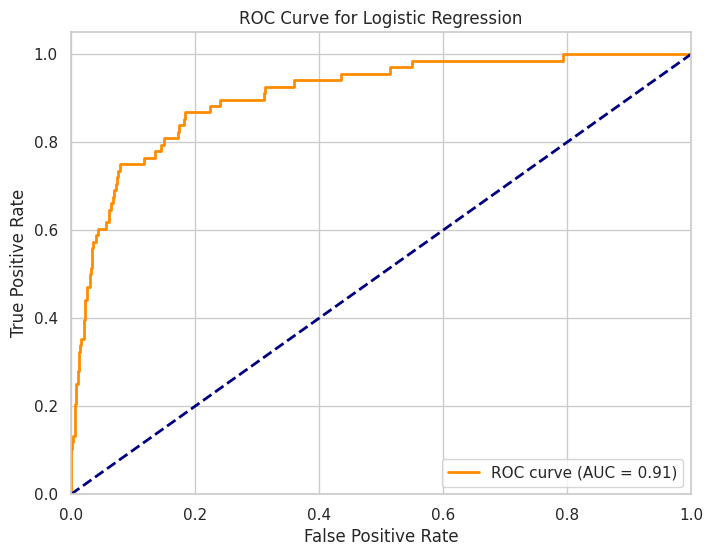

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

#plot ROU carve
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# 2)**XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Rename columns to remove invalid characters for XGBoost
X_train.columns = ["Air_temperature_K", "Process_temperature_K", "Rotational_speed_rpm", "Torque_Nm", "Tool_wear_min", "Type_L", "Type_M"]
X_test.columns = ["Air_temperature_K", "Process_temperature_K", "Rotational_speed_rpm", "Torque_Nm", "Tool_wear_min", "Type_L", "Type_M"]


model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
print("\nXGBoost")

# Cross-validation
cv_scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score_xgb = cv_scores_xgb.mean()

# Train and test
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print results
print(f"Cross-Validation Accuracy: {mean_cv_score_xgb:.4f}")
print(f"Test Accuracy: {test_accuracy_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost
Cross-Validation Accuracy: 0.9847
Test Accuracy: 0.9735
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.58      0.76      0.66        68

    accuracy                           0.97      2000
   macro avg       0.79      0.87      0.82      2000
weighted avg       0.98      0.97      0.98      2000



<Figure size 1000x600 with 0 Axes>

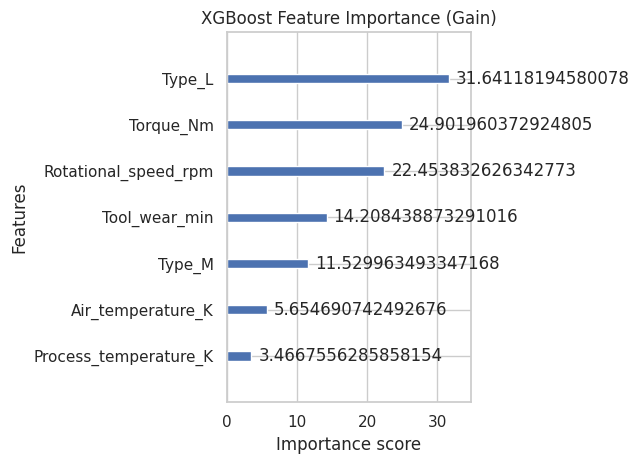

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(model_xgb,importance_type='gain',title='XGBoost Feature Importance (Gain)')
plt.tight_layout()
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize
nb_classifier = GaussianNB()


# Cross Validation
nb_scores = cross_val_score(nb_classifier, X_train_resampled, y_train_resampled,
                              cv=5, scoring='accuracy')
mean_nb_score = nb_scores.mean()

# Test
nb_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb_classifier.predict(X_test)

print("=== Naive Bayes ===")
print(f"Cross-Validation Mean Accuracy: {mean_nb_score:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_nb))

=== Naive Bayes ===
Cross-Validation Mean Accuracy: 0.8146
Test Accuracy: 0.8150

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1932
           1       0.12      0.71      0.21        68

    accuracy                           0.81      2000
   macro avg       0.55      0.76      0.55      2000
weighted avg       0.96      0.81      0.87      2000



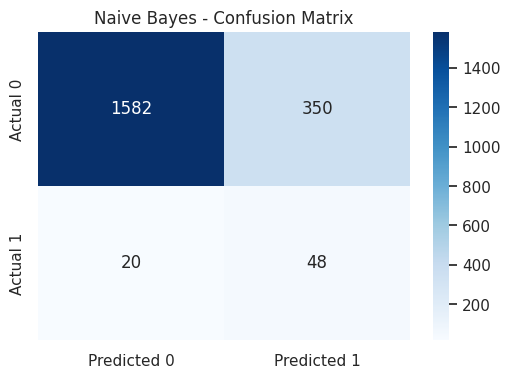

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize
svm_classifier = SVC(kernel='rbf', random_state=42)


# Cross Validation
svm_scores = cross_val_score(svm_classifier, X_train_resampled, y_train_resampled,
                              cv=5, scoring='accuracy')
mean_svm_score = svm_scores.mean()

# Test
svm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_classifier.predict(X_test)

print("=== SVM (Support Vector Machine) ===")
print(f"Cross-Validation Mean Accuracy: {mean_svm_score:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

=== SVM (Support Vector Machine) ===
Cross-Validation Mean Accuracy: 0.9429
Test Accuracy: 0.9155

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1932
           1       0.27      0.85      0.41        68

    accuracy                           0.92      2000
   macro avg       0.63      0.89      0.68      2000
weighted avg       0.97      0.92      0.94      2000



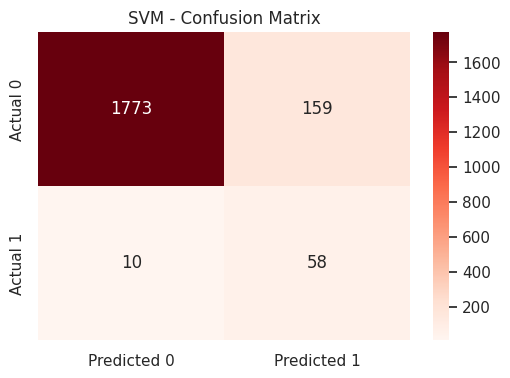

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm),
            annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM - Confusion Matrix')
plt.show()

# fine tuning the SVM classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='rbf', probability=False)


param_grid = {
    'C': [1, 10],
    'gamma': [0.1, 0.01]
}

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", grid.best_params_)
print("Best F1 Score on CV:", grid.best_score_)

#  Evaluate
best_svm = grid.best_estimator_
y_pred_grid = best_svm.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_grid))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'C': 10, 'gamma': 0.1}
Best F1 Score on CV: 0.9549077514737577

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1932
           1       0.29      0.82      0.43        68

    accuracy                           0.93      2000
   macro avg       0.64      0.88      0.70      2000
weighted avg       0.97      0.93      0.94      2000



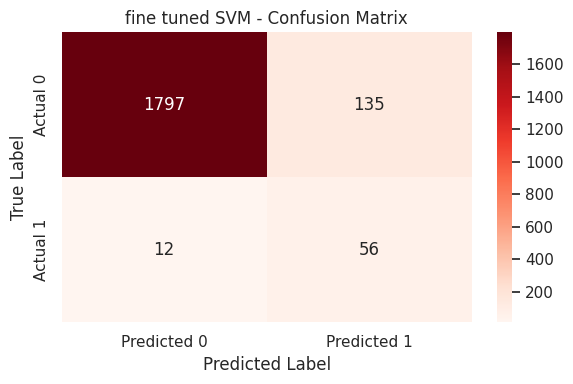

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_grid),
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['Actual 0', 'Actual 1']
)
plt.title('fine tuned SVM - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [ ]:
best_model.save("best_model.keras")

#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

model_dt = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
print("\nDecision Tree")

# Cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_cv_score_dt = cv_scores_dt.mean()

# Train and test
model_dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = model_dt.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print results
print(f"Cross-Validation Accuracy: {mean_cv_score_dt:.4f}")
print(f"Test Accuracy: {test_accuracy_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree
Cross-Validation Accuracy: 0.8853
Test Accuracy: 0.8760
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1932
           1       0.19      0.79      0.30        68

    accuracy                           0.88      2000
   macro avg       0.59      0.84      0.62      2000
weighted avg       0.96      0.88      0.91      2000



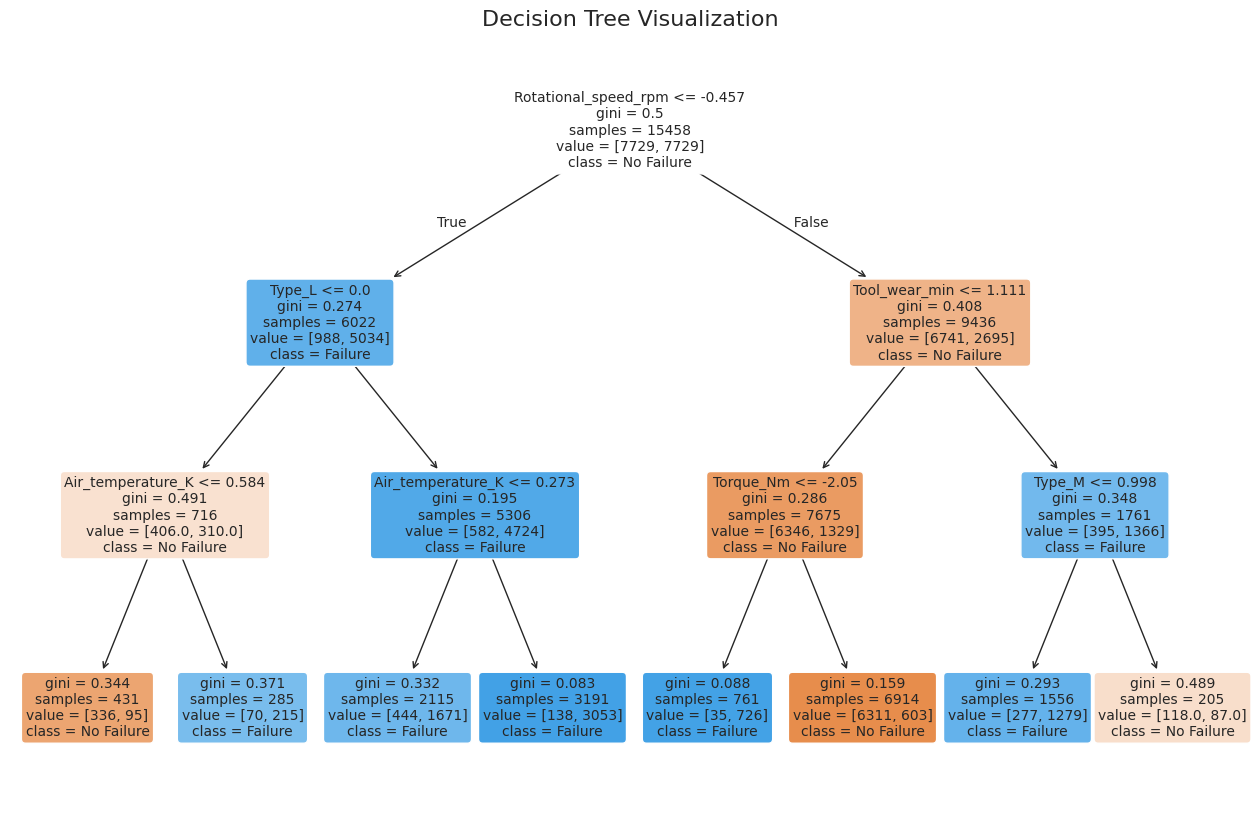

In [ ]:
from sklearn import tree

plt.figure(figsize=(16, 10))
plot_tree(
    model_dt,
    feature_names=X_train.columns,
    class_names=['No Failure', 'Failure'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
print("\nRandom Forest")

# Cross-validation
cv_scores_rf = cross_val_score(model_rf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_cv_score_rf = cv_scores_rf.mean()

# Train and test
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = model_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print results
print(f"Cross-Validation Accuracy: {mean_cv_score_rf:.4f}")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest
Cross-Validation Accuracy: 0.9812
Test Accuracy: 0.8760
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1932
           1       0.49      0.68      0.57        68

    accuracy                           0.97      2000
   macro avg       0.74      0.83      0.78      2000
weighted avg       0.97      0.97      0.97      2000



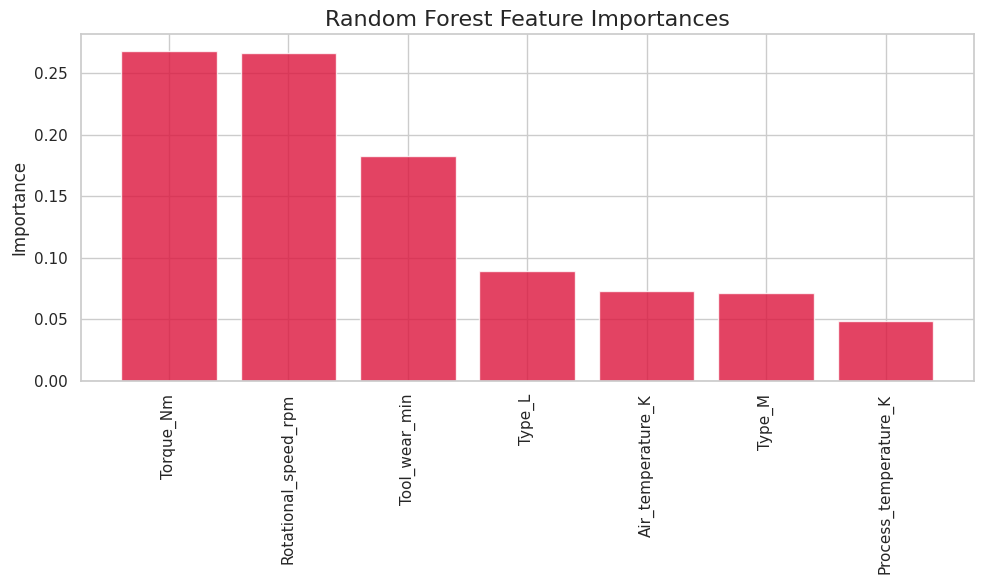

In [ ]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importances", fontsize=16)
plt.bar(range(X_train.shape[1]), importances[indices], color='crimson', alpha=0.8)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.ylabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors= 5)
knn_classifier.fit(X_train, y_train)

#Cross Validation Scoring
cv_scores_knn = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
mean_knn_score = cv_scores_knn.mean()

y_pred_knn = knn_classifier.predict(X_test)

print(f"Cross-Validation Accuracy: {mean_knn_score:.4f}")
print("Classification Report:")
print(classification_report(y_test ,y_pred_knn))


Cross-Validation Accuracy: 0.9609
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1932
           1       0.31      0.78      0.44        68

    accuracy                           0.93      2000
   macro avg       0.65      0.86      0.70      2000
weighted avg       0.97      0.93      0.95      2000



## Fine Tuning the KNN classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# The hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#Setting up the GridSearchCV
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='f1',      # Use F1 score for imbalance
    n_jobs=-1,         # Use all CPU cores
    verbose=1
)

grid.fit(X_train, y_train)

# 5. Show best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best F1 Score on CV:", grid.best_score_)

# Evaluate on the actual test set
from sklearn.metrics import classification_report

best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best F1 Score on CV: 0.9713206331542382

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1932
           1       0.31      0.66      0.42        68

    accuracy                           0.94      2000
   macro avg       0.65      0.81      0.70      2000
weighted avg       0.96      0.94      0.95      2000



## Confusion Matrix

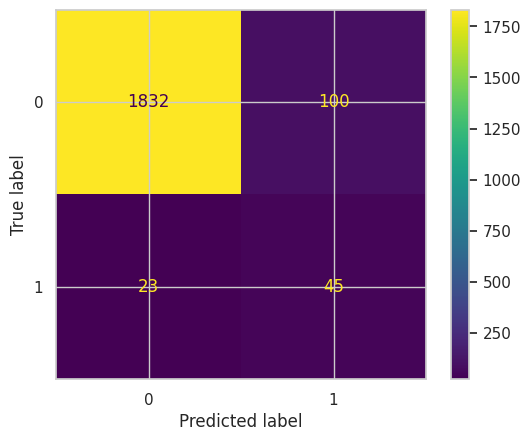

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)

## Precision Recall Curve

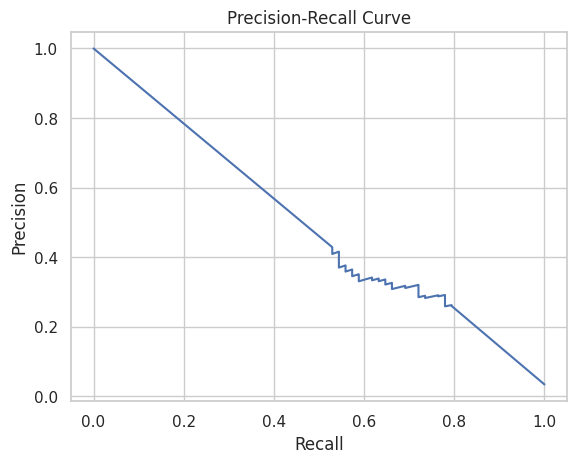

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba = best_knn.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

# Neural Network

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


## Using **keras_tuner** for **Fine Tuning** the Neural Network

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from keras_tuner import HyperModel

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units', 32, 128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(
            optimizer=Adam(hp.Choice('lr', [1e-2, 1e-3])),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice('batch_size', [16, 32, 64]),
            **kwargs
        )

tuner = kt.RandomSearch(  # Random Hyperparams Combinations
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='keras_batch_tuning'
)

tuner.search(X_train, y_train, epochs=5, validation_split=0.2)

Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.8722509741783142

Best val_accuracy So Far: 0.9527813792228699
Total elapsed time: 00h 03m 01s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #Top 1
print("Best learning rate:", best_hps.get('lr'))
print("Best number of neurons:", best_hps.get('units'))
best_hp = tuner.get_best_hyperparameters(1)[0]
print('Best batch size:', best_hp.get('batch_size'))

Best learning rate: 0.01
Best number of neurons: 96
Best batch size: 16


In [ ]:
history_further = best_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9455 - loss: 0.1381 - val_accuracy: 0.9208 - val_loss: 0.1828
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9516 - loss: 0.1229 - val_accuracy: 0.9288 - val_loss: 0.1677
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9526 - loss: 0.1177 - val_accuracy: 0.9166 - val_loss: 0.1794
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9512 - loss: 0.1183 - val_accuracy: 0.9292 - val_loss: 0.1456
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9554 - loss: 0.1132 - val_accuracy: 0.9599 - val_loss: 0.1249
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9530 - loss: 0.1173 - val_accuracy: 0.9583 - val_loss: 0.1151
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9561 - loss: 0.1047 - val_accuracy: 0.9483 - val_loss: 0.1295
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9553 - loss: 0.1099 - val_accuracy: